In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [15]:
train_df=pd.read_csv("../input/janatahack-healthcare-analytics-ii/Train/train.csv", index_col="case_id")
test_df=pd.read_csv("../input/janatahack-healthcare-analytics-ii/test.csv",index_col="case_id")

In [3]:
train_df.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
case_id,,,,,,,,,,,,,,,,,
1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [7]:
train_df.isnull().sum()

Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [8]:
train_df["Hospital_type_code"].value_counts()

a    143425
b     68946
c     45928
e     24770
d     20389
f     10703
g      4277
Name: Hospital_type_code, dtype: int64

In [9]:
train_df["Hospital_region_code"].value_counts()

X    133336
Y    122428
Z     62674
Name: Hospital_region_code, dtype: int64

In [10]:
train_df["Department"].value_counts()

gynecology            249486
anesthesia             29649
radiotherapy           28516
TB & Chest disease      9586
surgery                 1201
Name: Department, dtype: int64

In [11]:
train_df["Ward_Type"].value_counts()

R    127947
Q    106165
S     77794
P      5046
T      1477
U         9
Name: Ward_Type, dtype: int64

In [12]:
train_df["Ward_Facility_Code"].value_counts()

F    112753
E     55351
D     51809
C     35463
B     35156
A     27906
Name: Ward_Facility_Code, dtype: int64

In [13]:
train_df["Type of Admission"].value_counts()

Trauma       152261
Emergency    117676
Urgent        48501
Name: Type of Admission, dtype: int64

In [14]:
train_df["Severity of Illness"].value_counts()

Moderate    175843
Minor        85872
Extreme      56723
Name: Severity of Illness, dtype: int64

In [15]:
train_df["Age"].value_counts()

41-50     63749
31-40     63639
51-60     48514
21-30     40843
71-80     35792
61-70     33687
11-20     16768
81-90      7890
0-10       6254
91-100     1302
Name: Age, dtype: int64

In [16]:
train_df.head(20)

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
case_id,,,,,,,,,,,,,,,,,
1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
6,23,a,6,X,2,anesthesia,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,4449.0,11-20
7,32,f,9,Y,1,radiotherapy,S,B,3.0,31397,7.0,Emergency,Extreme,2,51-60,6167.0,0-10
8,23,a,6,X,4,radiotherapy,Q,F,3.0,31397,7.0,Trauma,Extreme,2,51-60,5571.0,41-50
9,1,d,10,Y,2,gynecology,R,B,4.0,31397,7.0,Trauma,Extreme,2,51-60,7223.0,51-60


In [17]:
train_df.dtypes

Hospital_code                          int64
Hospital_type_code                    object
City_Code_Hospital                     int64
Hospital_region_code                  object
Available Extra Rooms in Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed Grade                            float64
patientid                              int64
City_Code_Patient                    float64
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                  int64
Age                                   object
Admission_Deposit                    float64
Stay                                  object
dtype: object

In [18]:
train_df["Bed Grade"].unique()

array([ 2.,  3.,  4.,  1., nan])

In [19]:
train_df["Bed Grade"].unique()

array([ 2.,  3.,  4.,  1., nan])

In [20]:
sorted(train_df["City_Code_Patient"].unique())

[1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 13.0,
 14.0,
 nan,
 11.0,
 12.0,
 15.0,
 16.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0]

In [16]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()
def preprocess(train_df):

    train_df['Hospital_type_code'] = le.fit_transform(train_df['Hospital_type_code'])
    train_df['Hospital_region_code'] = le.fit_transform(train_df['Hospital_region_code'])
    train_df['Department'] = le.fit_transform(train_df['Department'])
    train_df['Ward_Type'] = le.fit_transform(train_df['Ward_Type'])
    train_df['Ward_Facility_Code'] = le.fit_transform(train_df['Ward_Facility_Code'])
    train_df['Type of Admission'] = le.fit_transform(train_df['Type of Admission'])
    train_df['Severity of Illness'] = le.fit_transform(train_df['Severity of Illness'])
    train_df["Age"]=le.fit_transform(train_df["Age"])
    train_df["Bed Grade"]=np.where(train_df["Bed Grade"].isna(),0,train_df["Bed Grade"])
    train_df["City_Code_Patient"]=np.where(train_df["City_Code_Patient"].isna(),0,train_df["City_Code_Patient"])
    train_df["Bed Grade"]=train_df["Bed Grade"].astype("int64")
    train_df["City_Code_Patient"]=train_df["City_Code_Patient"].astype("int64")
    train_df["Admission_Deposit"]=train_df["Admission_Deposit"].astype("int64")
#     train_df["Admission_Deposit"]=preprocessing.normalize([train_df.loc[:,"Admission_Deposit"]])[0]  
    train_df.drop(["patientid","Hospital_code"],axis=1,inplace=True)  
    return train_df

In [17]:
train_df=preprocess(train_df)
test_df=preprocess(test_df)
le_stay=LabelEncoder()
train_df["Stay"]=le_stay.fit_transform(train_df["Stay"])

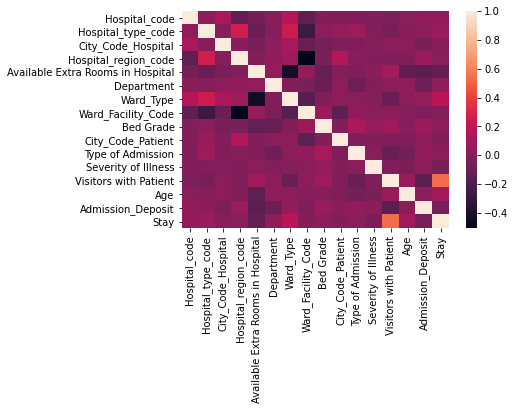

In [13]:
import seaborn as sns
cor=train_df.corr()
sns.heatmap(cor)

In [23]:
train_df.dtypes

Hospital_code                        int64
Hospital_type_code                   int64
City_Code_Hospital                   int64
Hospital_region_code                 int64
Available Extra Rooms in Hospital    int64
Department                           int64
Ward_Type                            int64
Ward_Facility_Code                   int64
Bed Grade                            int64
City_Code_Patient                    int64
Type of Admission                    int64
Severity of Illness                  int64
Visitors with Patient                int64
Age                                  int64
Admission_Deposit                    int64
Stay                                 int64
dtype: object

In [24]:
train_df.isna().sum()

Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

In [25]:
test_df.dtypes

Hospital_code                        int64
Hospital_type_code                   int64
City_Code_Hospital                   int64
Hospital_region_code                 int64
Available Extra Rooms in Hospital    int64
Department                           int64
Ward_Type                            int64
Ward_Facility_Code                   int64
Bed Grade                            int64
City_Code_Patient                    int64
Type of Admission                    int64
Severity of Illness                  int64
Visitors with Patient                int64
Age                                  int64
Admission_Deposit                    int64
dtype: object

In [26]:
test_df.isna().sum()

Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
dtype: int64

In [27]:
predictor_columns=list(pd.DataFrame(train_df.iloc[:,:-1]).columns)
target="Stay"

In [28]:
from sklearn.linear_model import LinearRegression,LogisticRegression

In [29]:
# lr=LinearRegression()
# lr.fit(train_df[predictor_columns],train_df[target])

In [30]:
# pred_lr=lr.predict(test_df)
# rnd=pred.round()
# for i in range(len(rnd)):
#     if rnd[i]<0:
#         rnd[i]=0
#     elif rnd[i]>10:
#         rnd[i]=10
# rnd=rnd.astype("int64")
# final=le_stay.inverse_transform(rnd)
# submission=pd.DataFrame({"case_id":test_df.index,"Stay":final})
# submission.to_csv("LR.csv",index=False)

In [31]:
# len(submission)

In [32]:
# logisticR=LogisticRegression(random_state=0, max_iter=1000, solver="sag")
# logisticR.fit(train_df[predictor_columns],train_df[target])
# pred_logisticR=logisticR.predict(test_df)
# pred_logisticR

In [33]:
# pd.DataFrame(pred_logisticR)[0].unique()

In [34]:
# submission_logisticR=pd.DataFrame({"case_id":test_df.index,"Stay":pred_logisticR})
# submission_logisticR.to_csv("LogisticR.csv",index=False)

In [35]:
# from sklearn import svm
# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler


# parameters = {'kernel':('rbf'), 'C':[1, 10]}
# svm_svc = SVC(kernel='rbf',C=1)
# print("pipeline created")
# svm_svc.fit(train_df[predictor_columns],train_df[target])
# print("training done")
# predict_svmsvc=svm_svc.predict(test_df)
# predict_svmsvc

In [36]:
# from sklearn.naive_bayes import GaussianNB
# gnb=GaussianNB()
# print("train started")
# gnb.fit(train_df[predictor_columns],train_df[target])
# print("train ended")
# predict_gnb=gnb.predict(test_df)
# predict_gnb

In [37]:
# sorted(pd.DataFrame(predict_gnb)[0].unique())

In [38]:
# submission_gnb=le_stay.inverse_transform(predict_gnb)

In [39]:
# submission_gnb=pd.DataFrame({"case_id":test_df.index,"Stay":submission_gnb})
# submission_gnb.to_csv("gnb.csv",index=False)

In [40]:
# from sklearn.naive_bayes import MultinomialNB
# mn_gnb=MultinomialNB()
# print("train started")
# mn_gnb.fit(train_df[predictor_columns],train_df[target])
# print("train ended")
# predict_mn_gnb=mn_gnb.predict(test_df)
# print(predict_mn_gnb)
# submission_mn_gnb=le_stay.inverse_transform(predict_mn_gnb)
# submission_mn_gnb=pd.DataFrame({"case_id":test_df.index,"Stay":submission_mn_gnb})
# submission_mn_gnb.to_csv("mn_normalised_gnb.csv",index=False)

In [41]:
# pd.DataFrame(predict_mn_gnb)[0].unique()

In [42]:
# from sklearn.naive_bayes import ComplementNB
# cnb=ComplementNB()
# print("train started")
# cnb.fit(train_df[predictor_columns],train_df[target])
# print("train ended")
# predict_cnb=cnb.predict(test_df)
# print(predict_cnb)
# submission_cnb=le_stay.inverse_transform(predict_cnb)
# submission_cnb=pd.DataFrame({"case_id":test_df.index,"Stay":submission_cnb})
# submission_cnb.to_csv("normalised_cnb.csv",index=False)

In [43]:
# sorted(pd.DataFrame(predict_cnb)[0].unique())

In [44]:
# from sklearn.neighbors import KNeighborsClassifier
# knc=KNeighborsClassifier()
# print("train started")
# knc.fit(train_df[predictor_columns],train_df[target])
# print("train ended")
# predict_knc=knc.predict(test_df)
# print(predict_knc)
# submission_knc=le_stay.inverse_transform(predict_knc)
# submission_knc=pd.DataFrame({"case_id":test_df.index,"Stay":submission_knc})
# submission_knc.to_csv("knc.csv",index=False)

In [45]:
# sorted(pd.DataFrame(predict_knc)[0].unique())

In [46]:
# from sklearn.neighbors import KNeighborsClassifier
# knc=KNeighborsClassifier(algorithm="ball_tree")
# print("train started")
# knc.fit(train_df[predictor_columns],train_df[target])
# print("train ended")
# predict_knc=knc.predict(test_df)
# print(predict_knc)
# submission_knc=le_stay.inverse_transform(predict_knc)
# submission_knc=pd.DataFrame({"case_id":test_df.index,"Stay":submission_knc})
# submission_knc.to_csv("knc_balltree.csv",index=False)

In [47]:
# sorted(pd.DataFrame(predict_knc)[0].unique())

In [48]:
# from sklearn import tree
# dtree=tree.DecisionTreeClassifier()
# print("train started")
# dtree.fit(train_df[predictor_columns],train_df[target])
# print("train ended")
# predict_dtree=dtree.predict(test_df)
# print(predict_dtree)
# submission_dtree=le_stay.inverse_transform(predict_dtree)
# submission_dtree=pd.DataFrame({"case_id":test_df.index,"Stay":submission_dtree})
# submission_dtree.to_csv("dtree.csv",index=False)

In [49]:
# sorted(pd.DataFrame(predict_dtree)[0].unique())

In [50]:
# from sklearn.ensemble import GradientBoostingClassifier
# gbc=GradientBoostingClassifier(max_depth=6)
# print("train started")
# gbc.fit(train_df[predictor_columns],train_df[target])
# print("train ended")
# predict_gbc=gbc.predict(test_df)
# print(predict_dtree)
# submission_gbc=le_stay.inverse_transform(predict_gbc)
# submission_gbc=pd.DataFrame({"case_id":test_df.index,"Stay":submission_gbc})
# submission_gbc.to_csv("gbc_.csv",index=False)

In [51]:
# sorted(pd.DataFrame(predict_gbc)[0].unique())

In [52]:
# from sklearn.ensemble import RandomForestClassifier
# rfc=RandomForestClassifier()
# print("train started")
# rfc.fit(train_df[predictor_columns],train_df[target])
# print("train ended")
# predict_rfc=rfc.predict(test_df)
# print(predict_dtree)
# submission_rfc=le_stay.inverse_transform(predict_rfc)
# submission_rfc=pd.DataFrame({"case_id":test_df.index,"Stay":submission_rfc})
# submission_rfc.to_csv("rfc.csv",index=False)

In [53]:
# sorted(pd.DataFrame(predict_rfc)[0].unique())

In [54]:
# from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
# abc=AdaBoostClassifier()
# print("train started")
# abc.fit(train_df[predictor_columns],train_df[target])
# print("train ended")
# predict_abc=abc.predict(test_df)
# print(predict_abc)
# submission_abc=le_stay.inverse_transform(predict_abc)
# submission_abc=pd.DataFrame({"case_id":test_df.index,"Stay":submission_abc})
# submission_abc.to_csv("abc.csv",index=False)

In [55]:
# sorted(pd.DataFrame(predict_abc)[0].unique())

In [56]:
# from xgboost import XGBClassifier
# xgb=XGBClassifier()
# print("train started")
# xgb.fit(train_df[predictor_columns],train_df[target])
# print("train ended")
# predict_xgb=xgb.predict(test_df)
# print(predict_xgb)
# submission_xgb=le_stay.inverse_transform(predict_xgb)
# submission_xgb=pd.DataFrame({"case_id":test_df.index,"Stay":submission_xgb})
# submission_xgb.to_csv("xgb.csv",index=False)

In [57]:
# sorted(pd.DataFrame(predict_xgb)[0].unique())

In [58]:
# params = {}
# params['learning_rate'] = 0.06
# params['max_depth'] = 50
# params['n_estimators'] = 500
# params['objective'] = 'multiclass'
# params['boosting_type'] = 'gbdt'
# params['subsample'] = 0.7
# params['random_state'] = 42
# params['colsample_bytree']=0.7
# params['min_data_in_leaf'] = 55
# params['reg_alpha'] = 1.6
# params['reg_lambda'] = 1.1

# from lightgbm import LGBMClassifier
# lgbm=LGBMClassifier(**params)
# print("train started")
# lgbm.fit(train_df[predictor_columns],train_df[target])
# print("train ended")
# predict_lgbm=lgbm.predict(test_df)
# print(predict_lgbm)
# submission_lgbm=le_stay.inverse_transform(predict_lgbm)
# submission_lgbm=pd.DataFrame({"case_id":test_df.index,"Stay":submission_lgbm})
# submission_lgbm.to_csv("lgbm_params.csv",index=False)

In [59]:
# sorted(pd.DataFrame(predict_xgb)[0].unique())

In [72]:
params = {}
params['learning_rate'] = [0.05]
params['max_depth'] = [-1]
params['n_estimators'] = [500]
params['objective'] = ['multiclass']
params['boosting_type'] = ['gbdt']
params['subsample'] = [0.7]
params['random_state'] = [42]
params['colsample_bytree']=[0.7]
params['min_data_in_leaf'] = [55]
params['reg_alpha'] = [1.6]
params['reg_lambda'] = [1.1]

from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
lgbm=GridSearchCV(LGBMClassifier(),params)
print("train started")
lgbm.fit(train_df[predictor_columns],train_df[target])
print("train ended")
predict_lgbm=lgbm.predict(test_df)
print(predict_lgbm)
submission_lgbm=le_stay.inverse_transform(predict_lgbm)
submission_lgbm=pd.DataFrame({"case_id":test_df.index,"Stay":submission_lgbm})
submission_lgbm.to_csv("lgbm_gridsearch.csv",index=False)

train started
train ended
[0 5 2 ... 1 1 3]


In [73]:
sorted(pd.DataFrame(predict_lgbm)[0].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [65]:
lgbm.best_estimator_

LGBMClassifier(colsample_bytree=0.7, learning_rate=0.05, max_depth=50,
               min_data_in_leaf=55, n_estimators=500, objective='multiclass',
               random_state=42, reg_alpha=1.6, reg_lambda=1.1, subsample=0.7)